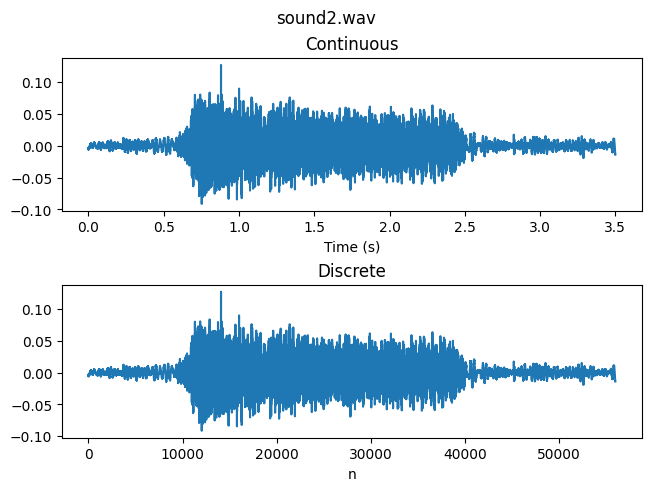

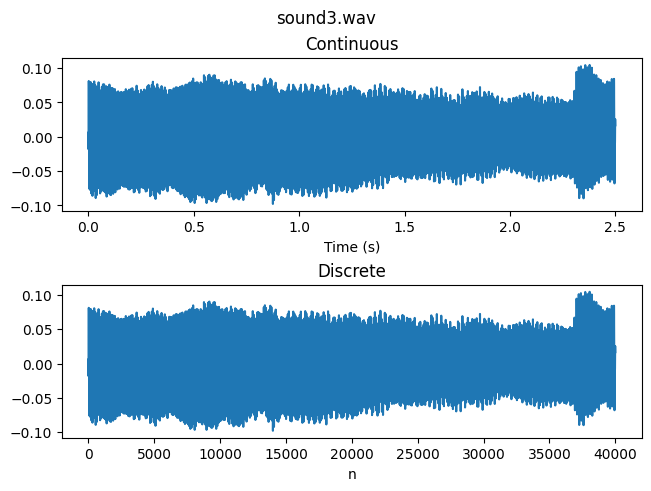

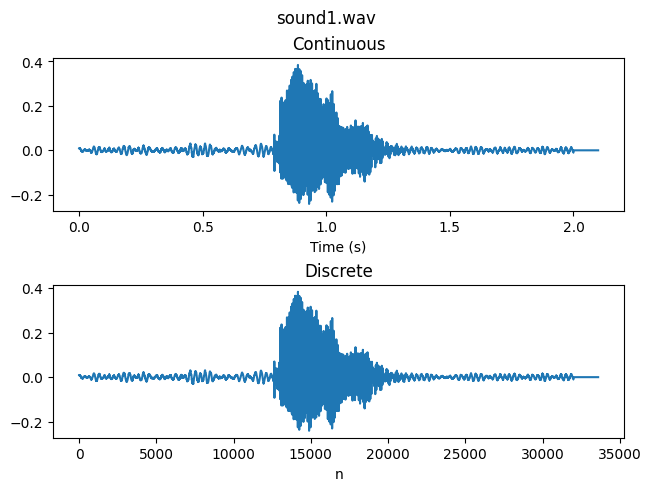

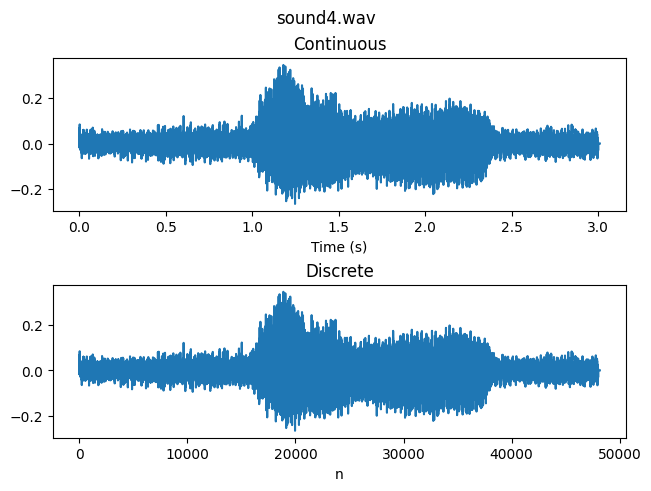

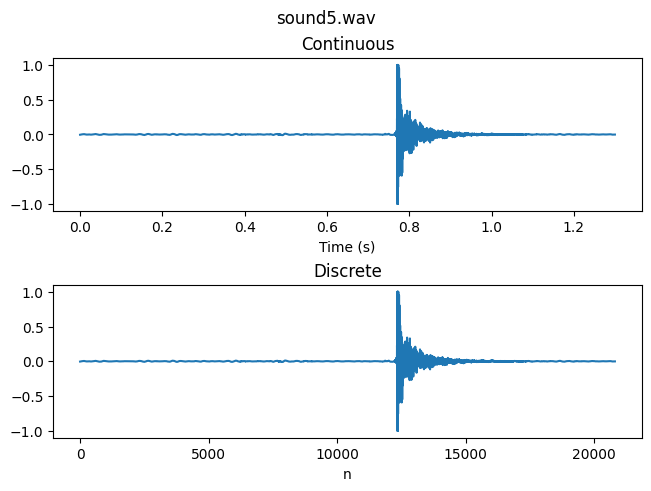

In [57]:
import matplotlib.pyplot as plt
import numpy as np
import os
import scipy.io.wavfile as wav
import sys
# import simpleaudio as sa

# Add the current directory to the path so we can import the plot and frames modules
sys.path.append('.')

from plot import plot_continuous, plot_continuous_discrete
from frames import non_overlapping_frames, overlapping_frames
from fundamental_frecuency import calculate_fundamental_frequency

AUDIO_DIR = '../audio'

# Plot all the .wav files in the audio directory
for file in os.listdir(AUDIO_DIR):
    if file.endswith('.wav'):
        file_path = os.path.join(AUDIO_DIR, file)
        fs, y = wav.read(file_path)
        y = y / 2**15 # normalize the signal
        plot_continuous_discrete(y, fs, file)

        # play the sound
        # wave_obj = sa.WaveObject.from_wave_file(file_path)
        # play_obj = wave_obj.play()
        # play_obj.wait_done()

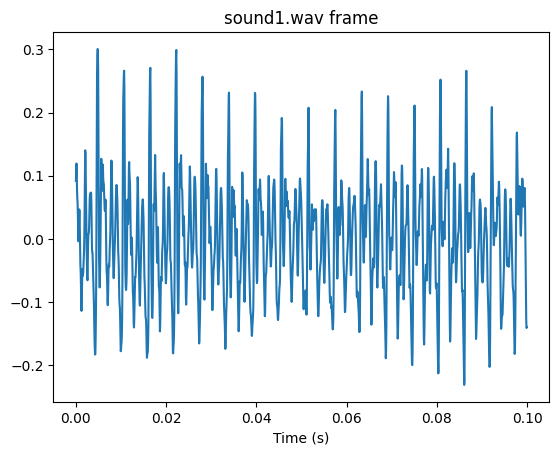

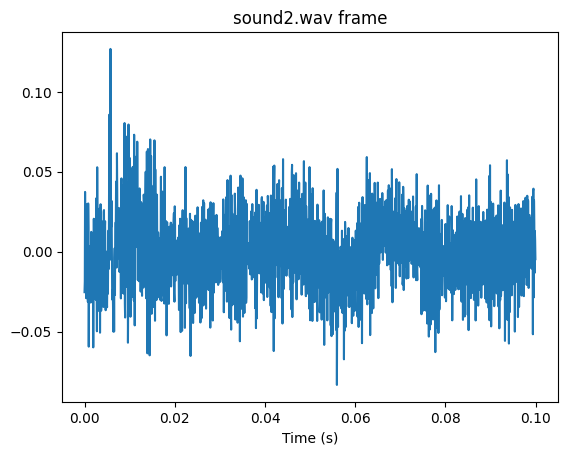

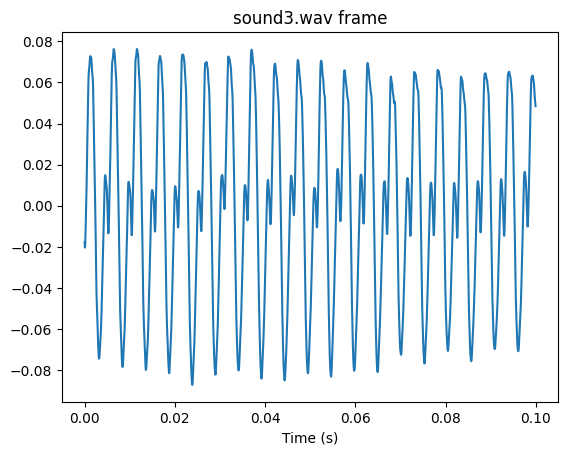

In [58]:
# get the signal and the sampling frequency of the first 3 .wav files
fs1, y1 = wav.read(os.path.join(AUDIO_DIR, 'sound1.wav'))
fs2, y2 = wav.read(os.path.join(AUDIO_DIR, 'sound2.wav'))
fs3, y3 = wav.read(os.path.join(AUDIO_DIR, 'sound3.wav'))
fs4, y4 = wav.read(os.path.join(AUDIO_DIR, 'sound4.wav'))
fs5, y5 = wav.read(os.path.join(AUDIO_DIR, 'sound5.wav')) 

# normalize the signals to match with matlab behavior
# samples are 16-bit signed integers in the range -32768 to 32767
y1 = y1 / 2 ** 15
y2 = y2 / 2 ** 15
y3 = y3 / 2 ** 15
y4 = y4 / 2 ** 15
y5 = y5 / 2 ** 15

# extract and visualize a 100ms frame from each signal
yframe1_len = round(0.1 * fs1)
yframe2_len = round(0.1 * fs2)
yframe3_len = round(0.1 * fs3)

yframe1 = y1[15000:15000 + yframe1_len]
yframe2 = y2[14000:14000 + yframe2_len]
yframe3 = y3[1000:1000 + yframe3_len]

plot_continuous(yframe1, fs1, 'sound1.wav frame')
plot_continuous(yframe2, fs2, 'sound2.wav frame')
plot_continuous(yframe3, fs3, 'sound3.wav frame')

In [59]:
# only the first and the third signals are periodic
print("Fundamental frecuecny of signal sound1.waw: ", calculate_fundamental_frequency(yframe1, fs1))
print("Fundamental frecuecny of signal sound3.waw: ", calculate_fundamental_frequency(yframe3, fs3))

Fundamental frecuecny of signal sound1.waw:  694.7637292464879
Fundamental frecuecny of signal sound3.waw:  194.0700808625337


In [60]:
# power of the signals
print('Power of sound1.wav:', (y1 ** 2).mean())
print('Power of sound2.wav:', (y2 ** 2).mean())
print('Power of sound3.wav:', (y3 ** 2).mean())

# energy of the signals
print('Energy of sound1.wav:', (y1 ** 2).sum())
print('Energy of sound2.wav:', (y2 ** 2).sum())
print('Energy of sound3.wav:', (y3 ** 2).sum())

Power of sound1.wav: 0.0013667823540024636
Power of sound2.wav: 0.00023101726882985245
Power of sound3.wav: 0.0017629009635537832
Energy of sound1.wav: 45.92388709448278
Energy of sound2.wav: 12.937198071740568
Energy of sound3.wav: 70.51780144311488


In [61]:
# get the energy of the signals in non overlapping frames of 100ms
E1_frames = (non_overlapping_frames(y1, fs1, 0.1) ** 2).sum(axis=0)
E2_frames = (non_overlapping_frames(y2, fs2, 0.1) ** 2).sum(axis=0)
E3_frames = (non_overlapping_frames(y3, fs3, 0.1) ** 2).sum(axis=0)

print('Energy of sound1.wav (non overlapping frames):', E1_frames)
print('Energy of sound2.wav (non overlapping frames):', E2_frames)
print('Energy of sound3.wav (non overlapping frames):', E3_frames)

Energy of sound1.wav (non overlapping frames): [8.55939379e-02 1.29535472e-01 1.55837758e-01 6.03303257e-02
 3.26599405e-01 2.27067842e-01 1.24440302e-01 4.25264693e-01
 1.44187493e+01 1.47851660e+01 8.63623433e+00 5.14376301e+00
 7.14686292e-01 1.32277749e-01 5.43409307e-02 1.03921903e-01
 1.04100458e-01 1.05015145e-01 1.09188259e-01 8.16809731e-02
 9.29981470e-05]
Energy of sound2.wav (non overlapping frames): [0.01466785 0.02605151 0.04042561 0.05605725 0.05694955 0.07967062
 0.24644497 1.06370077 1.09435346 0.87060477 0.84985423 0.66521748
 0.75401547 0.62365548 0.60099883 0.52555643 0.43344684 0.64981554
 0.49586443 0.45569229 0.53914423 0.55572469 0.70491283 0.47360901
 0.38749376 0.16096194 0.08815228 0.04446026 0.04633668 0.09452912
 0.07683397 0.04308763 0.05937697 0.0242974  0.03503857]
Energy of sound3.wav (non overlapping frames): [3.8680609  3.32501603 3.31144512 3.27298537 3.85548726 4.28025821
 4.01048989 3.53346085 3.53319488 3.35669963 3.56074152 3.29819138
 3.07521491

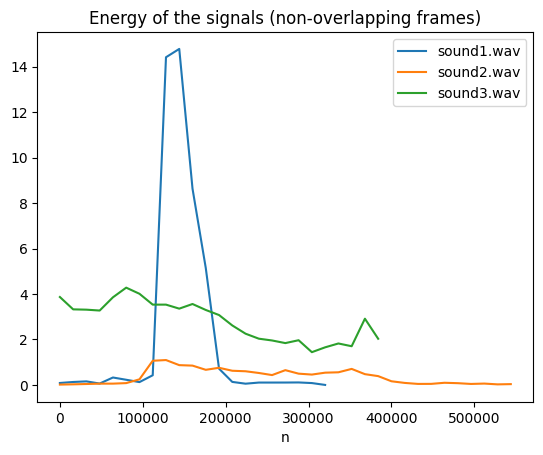

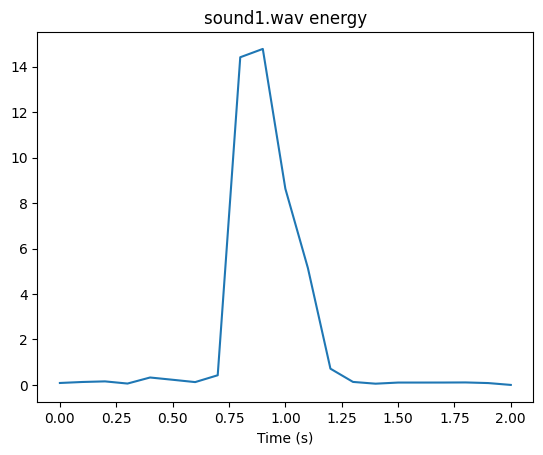

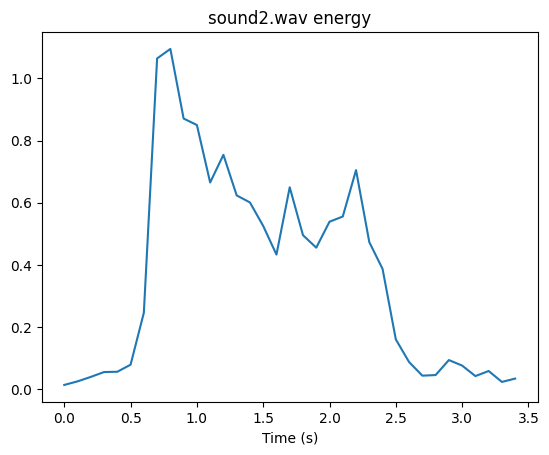

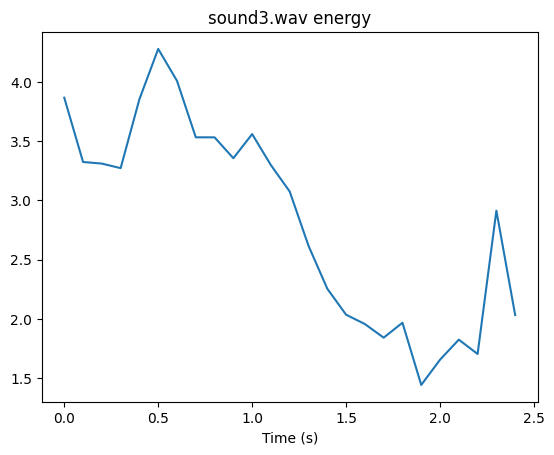

In [62]:
# plot the energy of the signals in discrete time
t1 = np.arange(len(E1_frames)) * fs1
t2 = np.arange(len(E2_frames)) * fs2
t3 = np.arange(len(E3_frames)) * fs3

plt.plot(t1, E1_frames, label='sound1.wav')
plt.plot(t2, E2_frames, label='sound2.wav')
plt.plot(t3, E3_frames, label='sound3.wav')
plt.xlabel('n')
plt.title('Energy of the signals (non-overlapping frames)')
plt.legend()
plt.show()

# plot the energy of the signals in continuous time
# the sampling frequency is 10Hz because the frames are 100ms long
plot_continuous(E1_frames, 10, 'sound1.wav energy')
plot_continuous(E2_frames, 10, 'sound2.wav energy')
plot_continuous(E3_frames, 10, 'sound3.wav energy')

In [63]:
# get the energy of the signals in overlapping frames of 100ms with 50% overlap
E1_frames = (overlapping_frames(y1, fs1, 0.02, 0.5) ** 2).sum(axis=0)
E4_frames = (overlapping_frames(y4, fs4, 0.02, 0.5) ** 2).sum(axis=0)
E5_frames = (overlapping_frames(y5, fs5, 0.02, 0.5) ** 2).sum(axis=0)

print('Energy of sound1.wav (overlapping frames 50%):\n', E1_frames)
print('Energy of sound4.wav (overlapping frames 50%):\n', E4_frames)
print('Energy of sound5.wav (overlapping frames 50%):\n', E5_frames)

Energy of sound1.wav (overlapping frames 50%):
 [7.99742993e-03 2.72037834e-03 7.48574734e-04 5.08213975e-03
 1.86440544e-02 3.44176376e-02 4.04170249e-02 3.32879219e-02
 1.77868539e-02 8.62064213e-03 6.38594478e-03 1.02555808e-02
 1.29512222e-02 8.37779045e-03 8.90159700e-03 2.20271591e-02
 3.91845684e-02 4.91195573e-02 6.21121395e-02 6.33310834e-02
 4.47514243e-02 1.97784109e-02 6.67232648e-03 1.84362903e-02
 3.73801524e-02 4.54787090e-02 5.11387801e-02 4.17680955e-02
 1.58950742e-02 4.92286310e-03 9.20366868e-03 1.45235034e-02
 1.45042678e-02 1.09506026e-02 4.77655232e-03 3.42750177e-03
 1.10869706e-02 1.90122621e-02 2.07588663e-02 2.11181035e-02
 1.75188929e-02 9.99182556e-03 2.45580832e-02 7.05421390e-02
 1.11389747e-01 1.24256015e-01 1.13243598e-01 8.38515293e-02
 5.98890847e-02 7.03425789e-02 9.88535332e-02 1.08563916e-01
 8.68112119e-02 5.19829635e-02 2.58229580e-02 9.06430464e-03
 2.71520764e-03 5.26730996e-03 1.28649315e-02 1.48928324e-02
 7.56013114e-03 5.19244280e-03 1.3461

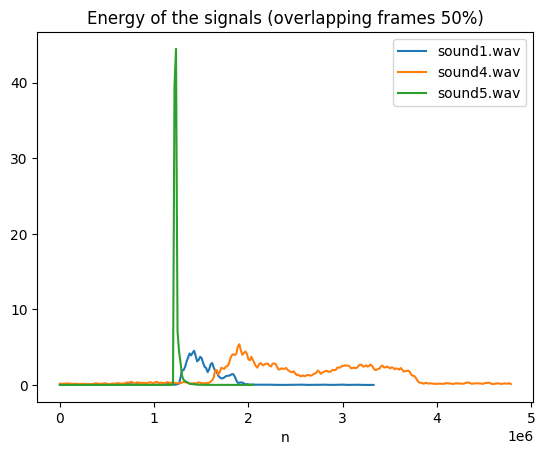

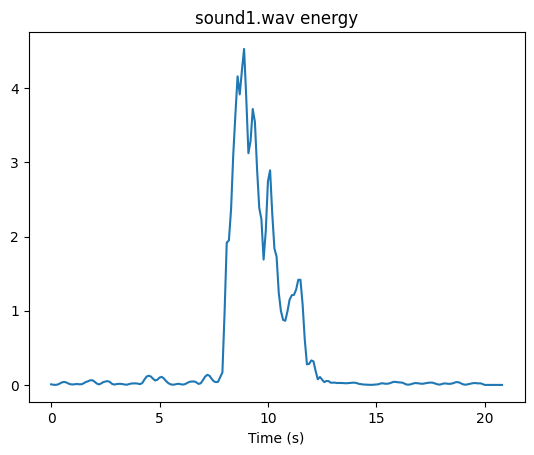

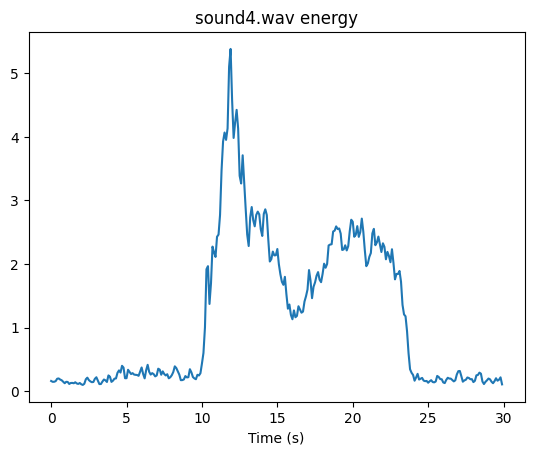

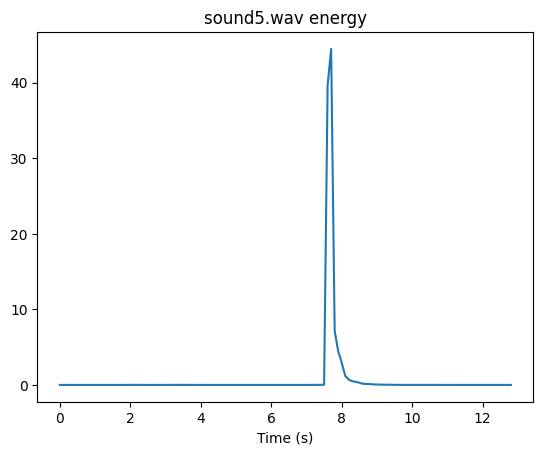

In [64]:
# plot the energy of the signals in discrete time
t1 = np.arange(len(E1_frames)) * fs1
t4 = np.arange(len(E4_frames)) * fs4
t5 = np.arange(len(E5_frames)) * fs5

plt.plot(t1, E1_frames, label='sound1.wav')
plt.plot(t4, E4_frames, label='sound4.wav')
plt.plot(t5, E5_frames, label='sound5.wav')
plt.xlabel('n')
plt.title('Energy of the signals (overlapping frames 50%)')
plt.legend()
plt.show()

# plot the energy of the signals in continuous time
# the sampling frequency is 10Hz because the frames are 100ms long
plot_continuous(E1_frames, 10, 'sound1.wav energy')
plot_continuous(E4_frames, 10, 'sound4.wav energy')
plot_continuous(E5_frames, 10, 'sound5.wav energy')